In [1]:
from keras import models
from keras import layers
from keras.applications import Xception
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf

DATASET_PATH = './ALL X Ray/train'
test_dir = './ALL X Ray/test'

IMAGE_SIZE = (150, 150)
NUM_CLASSES = 3
BATCH_SIZE = 10 
NUM_EPOCHS = 20
LEARNING_RATE =0.0005

from keras.preprocessing.image import ImageDataGenerator

#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 featurewise_center = True,
 featurewise_std_normalization = True,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 zca_whitening = True,
 channel_shift_range = 20,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2,
 fill_mode="constant")


train_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "training",
 seed=42,
 class_mode="categorical",
 
 )


valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "validation",
 seed=42,
 class_mode="categorical",
 
 
 )

Using TensorFlow backend.
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 474 images belonging to 3 classes.
Found 117 images belonging to 3 classes.


In [2]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
import keras

conv_base = InceptionV3(weights='imagenet',
 include_top=False,
 input_shape=(150, 150, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
 
optimizer=optimizers.Adam(lr=LEARNING_RATE),
metrics=['acc'])
model.save('CovidInceptionV3.model')

In [3]:
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size



from keras.callbacks import CSVLogger

csv_InceptionV3 = CSVLogger('trainingInceptionV3.log', separator=',', append=False)

#the result and history of training is saved in resultRes50
resultInceptionV3 = model.fit_generator(train_batches,
 steps_per_epoch =STEP_SIZE_TRAIN,
 validation_data = valid_batches,
 validation_steps = STEP_SIZE_VALID,
 epochs= NUM_EPOCHS,
 callbacks=[csv_InceptionV3]
 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20


C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 70s 1s/step - loss: 1.3286 - acc: 0.4383 - val_loss: 1.1525 - val_acc: 0.5182
Epoch 2/20
47/47 [==============================] - 86s 2s/step - loss: 0.8978 - acc: 0.6128 - val_loss: 0.6761 - val_acc: 0.6822
Epoch 3/20
47/47 [==============================] - 80s 2s/step - loss: 0.7271 - acc: 0.7117 - val_loss: 2.9431 - val_acc: 0.3832
Epoch 4/20
47/47 [==============================] - 86s 2s/step - loss: 0.6314 - acc: 0.7404 - val_loss: 2.6827 - val_acc: 0.5421
Epoch 5/20
47/47 [==============================] - 94s 2s/step - loss: 0.6501 - acc: 0.7457 - val_loss: 1.1926 - val_acc: 0.6168
Epoch 6/20
47/47 [==============================] - 93s 2s/step - loss: 0.5885 - acc: 0.7490 - val_loss: 1.8062 - val_acc: 0.6449
Epoch 7/20
47/47 [==============================] - 75s 2s/step - loss: 0.5256 - acc: 0.8063 - val_loss: 1.2633 - val_acc: 0.6729
Epoch 8/20
47/47 [==============================] - 93s 2s/step - loss: 0.5758 - acc: 0.7787 - val_lo

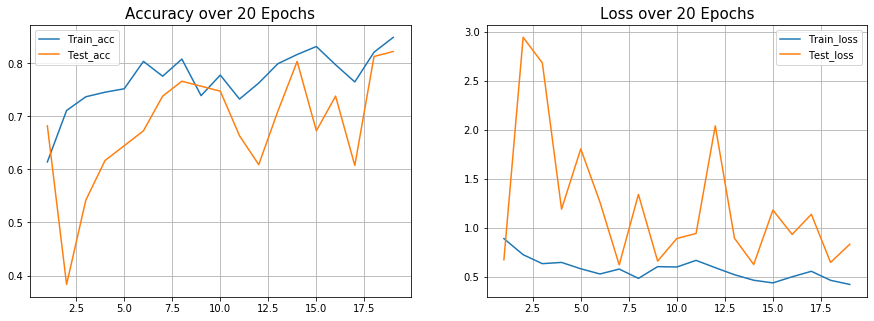

In [4]:
import matplotlib.pyplot as plt
import numpy as np


acc = np.array(resultInceptionV3.history['acc'])
loss = np.array(resultInceptionV3.history['loss'])
val_acc = np.array(resultInceptionV3.history['val_acc'])
val_loss = np.array(resultInceptionV3.history['val_loss'])
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(range(1,NUM_EPOCHS), acc[1:], label='Train_acc')
plt.plot(range(1,NUM_EPOCHS), val_acc[1:], label='Test_acc')
plt.title('Accuracy over '  + str(NUM_EPOCHS) + ' Epochs', size=15)
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.plot(range(1,NUM_EPOCHS), loss[1:], label='Train_loss')
plt.plot(range(1,NUM_EPOCHS), val_loss[1:], label='Test_loss')
plt.title('Loss over ' + str(NUM_EPOCHS) + ' Epochs', size=15)
plt.legend()
plt.grid(True)
plt.show()